# EDA

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy.stats import kruskal
import seaborn as sns

In [76]:
#Importing the cleaned file and loading its constents into the DataFrame
cleaned_df = pd.read_csv(r"C:\Users\ottok\OneDrive\Documents\Ai_resit_cleaned.csv")
cleaned_df.head()

,rating,runtime,metascore,userscore,genre,worldwide_box_office,opening_weekend,theatre_count,avg_run_per_theatre,creative_type,month
0,1,104.0,76,7.7,1,108286422.0,24727437.0,3391.0,4.9,1,3
1,2,100.0,61,6.9,2,987640.0,22707.0,3.0,2.1,1,9
2,2,93.0,44,6.1,2,307.0,1701785.0,819.5,4.2,1,1
3,3,93.0,65,6.7,2,47019.0,1701785.0,819.5,4.2,1,5
4,2,107.0,36,6.7,2,143782.0,20774.0,6.0,3.8,2,8


Looking at descriptive statistics for the features

In [77]:
#Checking descriptive statistics of the cleaned data
descriptive_stats = cleaned_df.describe()
print(descriptive_stats)


            rating      runtime    metascore    userscore        genre  \
count  5824.000000  5824.000000  5824.000000  5824.000000  5824.000000   
mean      2.627576   105.415350    57.099760     6.562036     4.106456   
std       1.891765    19.353834    17.330742     1.320316     2.789421   
min       1.000000    30.000000     1.000000     0.600000     1.000000   
25%       1.000000    94.000000    45.000000     5.900000     2.000000   
50%       2.000000   103.000000    58.000000     6.700000     3.000000   
75%       3.000000   114.000000    71.000000     7.500000     6.000000   
max      16.000000   808.000000   100.000000     9.700000    13.000000   

       worldwide_box_office  opening_weekend  theatre_count  \
count          5.824000e+03     5.824000e+03    5824.000000   
mean           7.248832e+07     9.327279e+06    1315.666380   
std            1.699726e+08     1.992225e+07    1364.246184   
min            1.200000e+01     4.700000e+01       1.000000   
25%            7.7

Based on the provided output, we can draw several conclusions about the dataset:

**Rating Distribution:** The average rating for movies in the dataset is approximately 2.63. The ratings range from 1 to 16, with 25% of movies having a rating of 1 and 75% having a rating of 3 or lower. Therefore we can see that there are mainly 3 categories of rating in the dataset out of all the 16.

**Runtime:** The average runtime of movies is around 105 minutes, with a standard deviation of approximately 19 minutes. The shortest movie in the dataset runs for 30 minutes, while the longest one runs for 808 minutes.

**Metascore and Userscore:** The average metascore is approximately 57, while the average userscore is around 6.56. Metascores range from 1 to 100, while userscores range from 0.6 to 9.7.

**Genre:** The genre distribution shows that the dataset encompasses a variety of genres, ranging from 1 to 13. The average genre value is around 4.1. We can also see that 75% of genres belong to the first 6 categories, with the remaining 7 belonging to the last 25%.

**Worldwide Box Office:** The worldwide box office grosses vary significantly, with an average of approximately $72.5 million.

**Opening Weekend:** Opening weekend earnings have an average of about $9.3 million.

**Theatre Count and Average Run per Theatre:** The average theatre count is around 1315, while the average runs per theatre is approximately 4.63. However, there's a notable standard deviation in both metrics, indicating variability in distribution.

**Creative Type:** The average creative type value is about 2.48 and overall the values range from 1 to 9. However, we can see that 75% of the dataset belong to the first 4 creative type groups.

**Month:** The average month value is around 6.85, while values range from 1 to 12 for every month.

### Runtime

Checking the distribution and removing the outliers using the aforementioned data from descriptive statistics and also seeing that the distribution would look normal.

<Axes: >

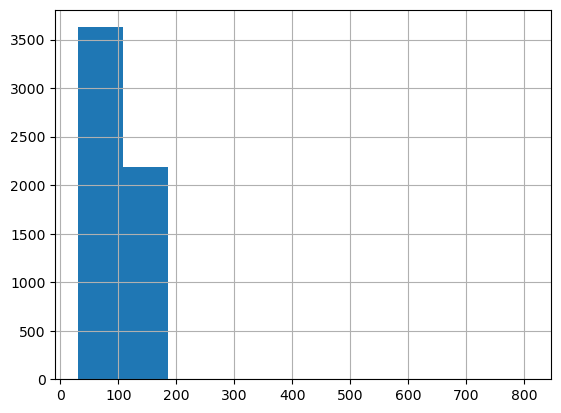

In [78]:
#Disribution of the runtime
cleaned_df['runtime'].hist()


<Axes: >

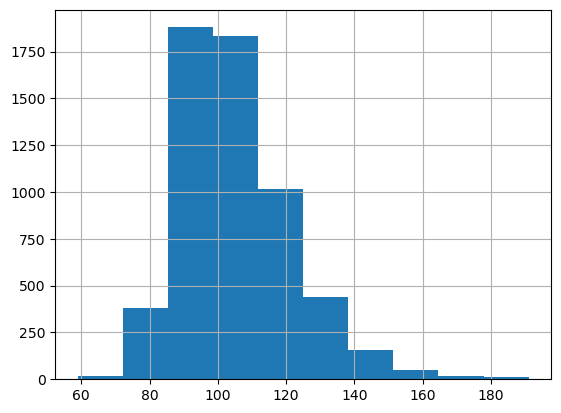

In [79]:
#Removing outliers with runtime 200 or over and 50 or under
cleaned_df = cleaned_df[(cleaned_df['runtime'] < 200) & (cleaned_df['runtime'] > 50)]

#Distribution of the runtime after removing outliers
cleaned_df['runtime'].hist()

Seeing the relationship between Runtime and Worldwide box office. From the scatter plot we don't really see a strong direction of relationship between the variables

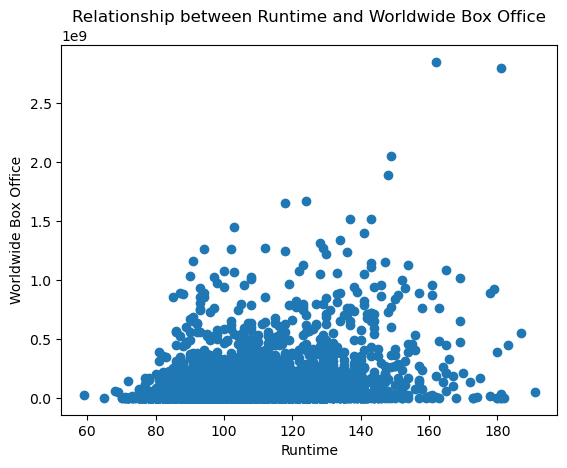

In [80]:
#Create a scatter plot
plt.scatter(cleaned_df['runtime'], cleaned_df['worldwide_box_office'])
plt.xlabel('Runtime')
plt.ylabel('Worldwide Box Office')
plt.title('Relationship between Runtime and Worldwide Box Office')

#Show the plot
plt.show()


We also want to calculate the actual vs predicted values with the regression line. We do this to check the assumption of linearity in order to run a regression analysis. If this assumption holds true, the plot of actual vs. predicted values should show points scattered around the regression line in a random, evenly distributed manner, without any discernible pattern.

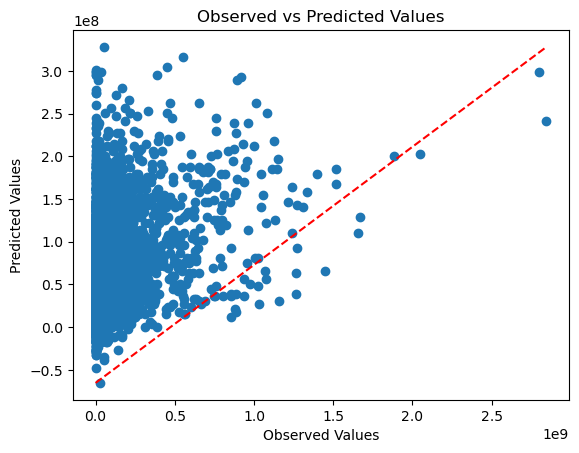

In [81]:
#Calculating the regression line equation
x = cleaned_df['runtime']
y = cleaned_df['worldwide_box_office']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

#Extracting the observed and predicted values
observed = cleaned_df['worldwide_box_office']
predicted = regression_line(cleaned_df['runtime'])

#Plotting the observed vs predicted values
plt.scatter(observed, predicted)
plt.plot([min(observed), max(observed)], [min(predicted), max(predicted)], color='red', linestyle='--')  # Add the regression line
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')

plt.show()


The assumption of linearity is not met so we cannot run the regression analysis. We do however, want to check the correlation between runtime and worldwide box office. We cannot imply causation so we can't tell whether one variable causes changes in the other, only that they tend to change together.

In [82]:
#Seeing the correlation between runtime and worldwide box office
correlation = cleaned_df['runtime'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Runtime and Worldwide Box Office:", correlation)


Correlation between Runtime and Worldwide Box Office: 0.2862220759713069


We can conclude that there is a small correlation between runtime and worldwide box office.

### Metascore

Checking the distribution of metascore and seeing that it is a normal distribution

<Axes: >

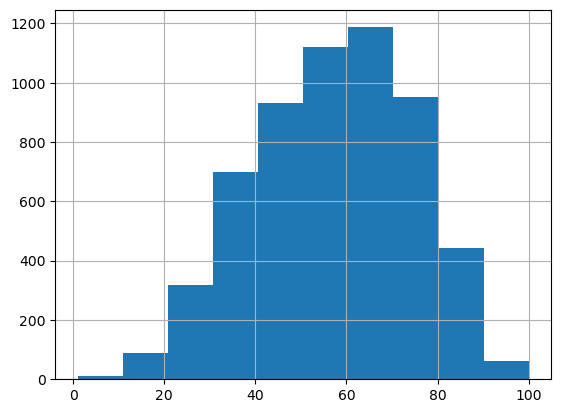

In [83]:
#Disribution of the metascore
cleaned_df['metascore'].hist()


Seeing the relationship between Metascore and Worldwide box office. From the scatter plot we don't really see a strong direction of relationship between the variables

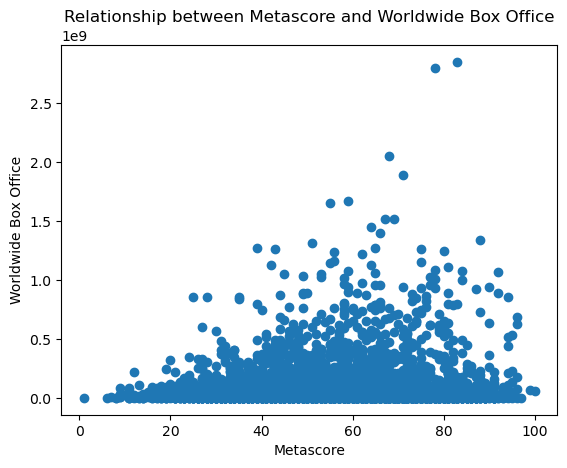

In [84]:
#Creating a scatter plot
plt.scatter(cleaned_df['metascore'], cleaned_df['worldwide_box_office'])
plt.xlabel('Metascore')
plt.ylabel('Worldwide Box Office')
plt.title('Relationship between Metascore and Worldwide Box Office')

#Showing the plot
plt.show()


We also want to calculate the actual vs predicted values with the regression line. We do this to check the assumption of linearity in order to run a regression analysis. If this assumption holds true, the plot of actual vs. predicted values should show points scattered around the regression line in a random, evenly distributed manner, without any discernible pattern.

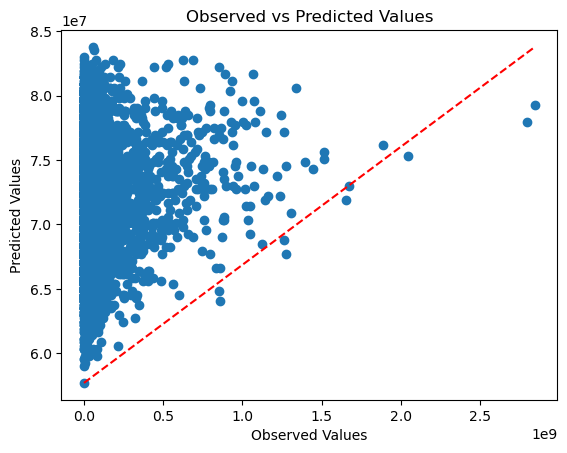

In [85]:
#Calculating the regression line equation
x = cleaned_df['metascore']
y = cleaned_df['worldwide_box_office']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

#Extracting the observed and predicted values
observed = cleaned_df['worldwide_box_office']
predicted = regression_line(cleaned_df['metascore'])

#Plotting the observed vs predicted values
plt.scatter(observed, predicted)
plt.plot([min(observed), max(observed)], [min(predicted), max(predicted)], color='red', linestyle='--')  # Add the regression line
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')

plt.show()

The assumption of linearity is not met so we cannot run the regression analysis. We do however, want to check the correlation between runtime and worldwide box office. We cannot imply causation so we can't tell whether one variable causes changes in the other, only that they tend to change together.

In [86]:
#Seeing the correlation between metascore and worldwide box office
correlation = cleaned_df['metascore'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Metascore and Worldwide Box Office:", correlation)


Correlation between Metascore and Worldwide Box Office: 0.02689552790125509


We can conclude that there is basically no correlation between metascore and worldwide box office.

### Userscore

Checking the distribution of userscore to see if there are any outliers that we need to drop. We decide against it because even though the distribution is a bit skewed, there are no concrete outliers.

<Axes: >

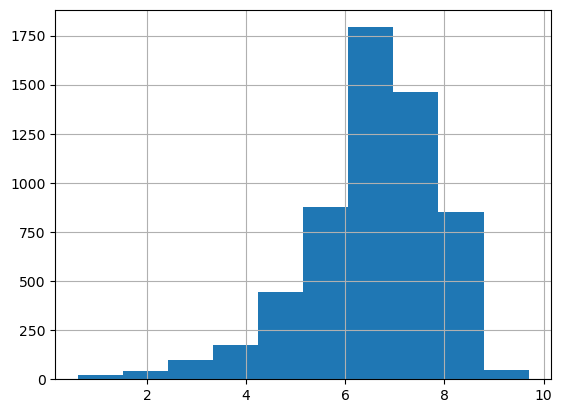

In [87]:
#Disribution of the userscore
cleaned_df['userscore'].hist()


Seeing the relationship between Userscore and Worldwide box office. From the scatter plot we see a slight positive direction of relationship between the variables

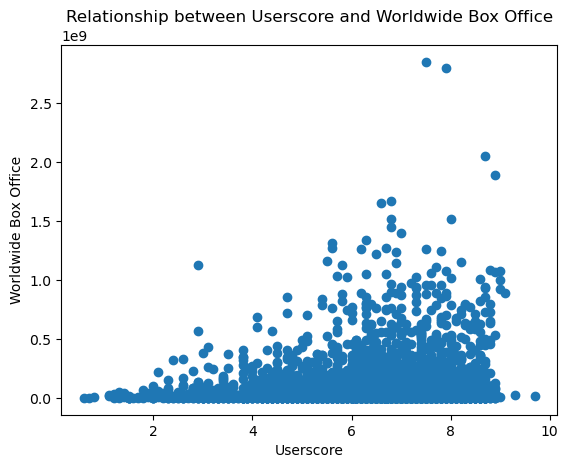

In [88]:
#Creating a scatter plot
plt.scatter(cleaned_df['userscore'], cleaned_df['worldwide_box_office'])
plt.xlabel('Userscore')
plt.ylabel('Worldwide Box Office')
plt.title('Relationship between Userscore and Worldwide Box Office')

#Showing the plot
plt.show()


We also want to calculate the actual vs predicted values with the regression line. We do this to check the assumption of linearity in order to run a regression analysis. If this assumption holds true, the plot of actual vs. predicted values should show points scattered around the regression line in a random, evenly distributed manner, without any discernible pattern.

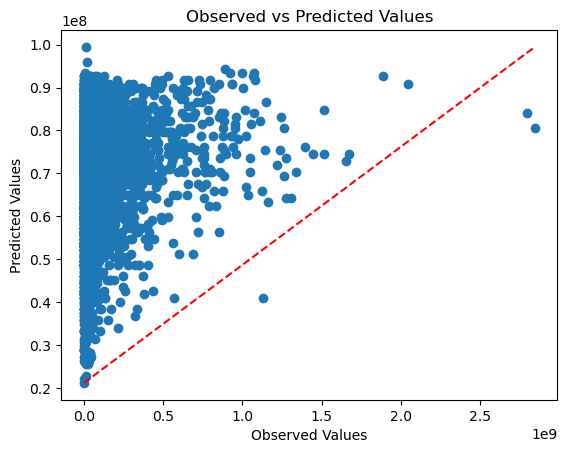

In [89]:
#Calculating the regression line equation
x = cleaned_df['userscore']
y = cleaned_df['worldwide_box_office']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

#Extracting the observed and predicted values
observed = cleaned_df['worldwide_box_office']
predicted = regression_line(cleaned_df['userscore'])

#Plotting the observed vs predicted values
plt.scatter(observed, predicted)
plt.plot([min(observed), max(observed)], [min(predicted), max(predicted)], color='red', linestyle='--')  # Add the regression line
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')

plt.show()

The assumption of linearity is not met so we cannot run the regression analysis. We do however, want to check the correlation between runtime and worldwide box office. We cannot imply causation so we can't tell whether one variable causes changes in the other, only that they tend to change together.

In [90]:
#Seeing the correlation between userscore and worldwide box office
correlation = cleaned_df['userscore'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Userscore and Worldwide Box Office:", correlation)


Correlation between Userscore and Worldwide Box Office: 0.06699833423961592


We conclude that there is basically no correlation between userscore and worldwide box office.

### Opening weekend

Checking the distribution of opening weekend and dropping the outliers by leaving everything that is inside one standard deviation.

<Axes: >

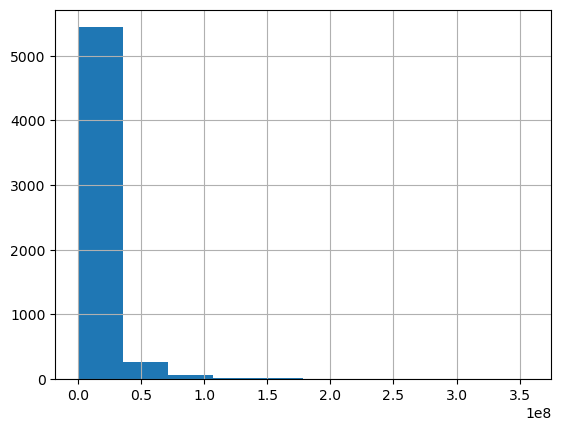

In [91]:
#Disribution of the opening weekend
cleaned_df['opening_weekend'].hist()

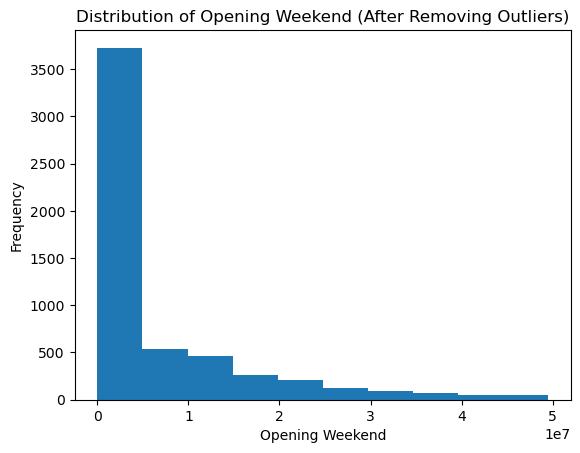

In [92]:
#Removing outliers after 0.5e8 in the opening_weekend column
cleaned_df = cleaned_df[(cleaned_df['opening_weekend'] < 0.5e8)]

#Creating a new histogram of the opening_weekend column
plt.hist(cleaned_df['opening_weekend'], bins=10)
plt.xlabel('Opening Weekend')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Weekend (After Removing Outliers)')
plt.show()


Seeing the relationship between Opening weekend and Worldwide box office. From the scatter plot we don't really see quite a strong positive direction of relationship between the variables

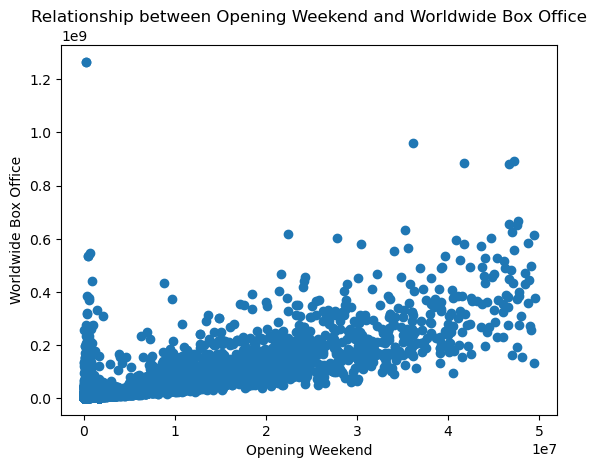

In [93]:
#Creating a scatter plot
plt.scatter(cleaned_df['opening_weekend'], cleaned_df['worldwide_box_office'])
plt.xlabel('Opening Weekend')
plt.ylabel('Worldwide Box Office')
plt.title('Relationship between Opening Weekend and Worldwide Box Office')

#Showing the plot
plt.show()


We also want to calculate the actual vs predicted values with the regression line. We do this to check the assumption of linearity in order to run a regression analysis. If this assumption holds true, the plot of actual vs. predicted values should show points scattered around the regression line in a random, evenly distributed manner, without any discernible pattern.

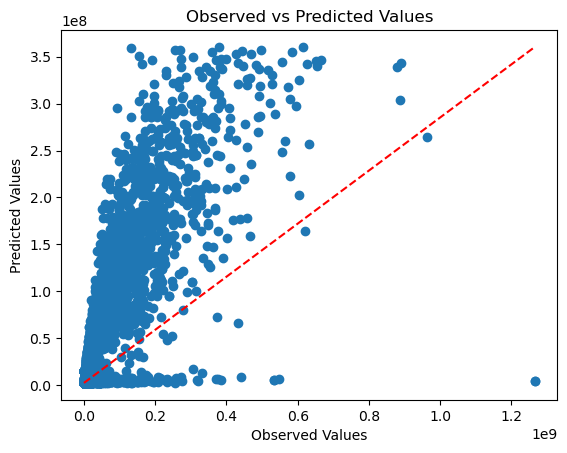

In [94]:
#Calculating the regression line equation
x = cleaned_df['opening_weekend']
y = cleaned_df['worldwide_box_office']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

#Extracting the observed and predicted values
observed = cleaned_df['worldwide_box_office']
predicted = regression_line(cleaned_df['opening_weekend'])

#Plotting the observed vs predicted values
plt.scatter(observed, predicted)
plt.plot([min(observed), max(observed)], [min(predicted), max(predicted)], color='red', linestyle='--')  # Add the regression line
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')

plt.show()

The assumption of linearity is not met so we cannot run the regression analysis. We do however, want to check the correlation between runtime and worldwide box office. We cannot imply causation so we can't tell whether one variable causes changes in the other, only that they tend to change together.

In [95]:
#Seeing the correlation between opening weekend and worldwide box office
correlation = cleaned_df['opening_weekend'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Opening Weekend and Worldwide Box Office:", correlation)


Correlation between Opening Weekend and Worldwide Box Office: 0.7836321966670537


We conclude that there is a high correlation between opening weekend and worldwide box office.

### Theatre count

Checking the distribution of theatre count and dropping visible outliers.

<Axes: >

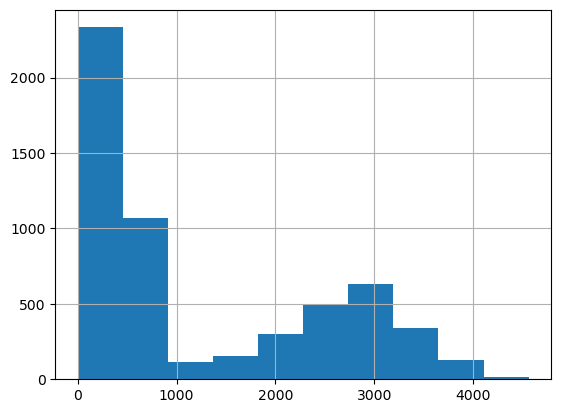

In [96]:
#Disribution of theatre count
cleaned_df['theatre_count'].hist()

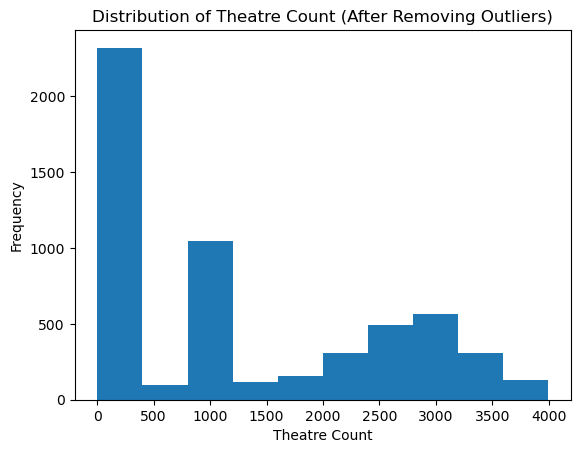

In [97]:
#Removing outliers after 4000 in the dataset
cleaned_df = cleaned_df[cleaned_df['theatre_count'] <= 4000]

#Creating a new histogram of the theatre count
plt.hist(cleaned_df['theatre_count'], bins=10)
plt.xlabel('Theatre Count')
plt.ylabel('Frequency')
plt.title('Distribution of Theatre Count (After Removing Outliers)')
plt.show()


Seeing the relationship between Theatre count and Worldwide box office. From the scatter plot wesee a very weak positive relationship between the variables

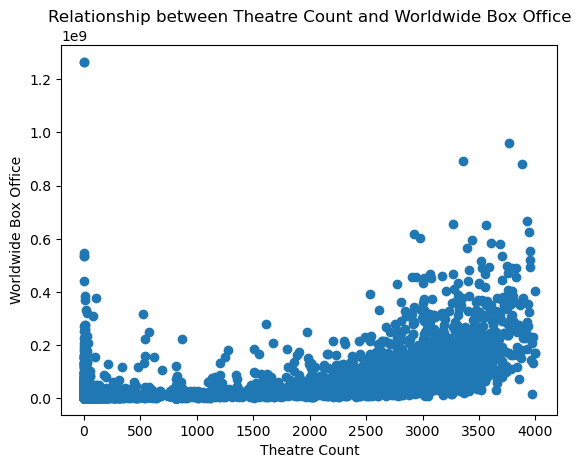

In [98]:
#Creating a scatter plot
plt.scatter(cleaned_df['theatre_count'], cleaned_df['worldwide_box_office'])
plt.xlabel('Theatre Count')
plt.ylabel('Worldwide Box Office')
plt.title('Relationship between Theatre Count and Worldwide Box Office')

#Showing the plot
plt.show()


We also want to calculate the actual vs predicted values with the regression line. We do this to check the assumption of linearity in order to run a regression analysis. If this assumption holds true, the plot of actual vs. predicted values should show points scattered around the regression line in a random, evenly distributed manner, without any discernible pattern.

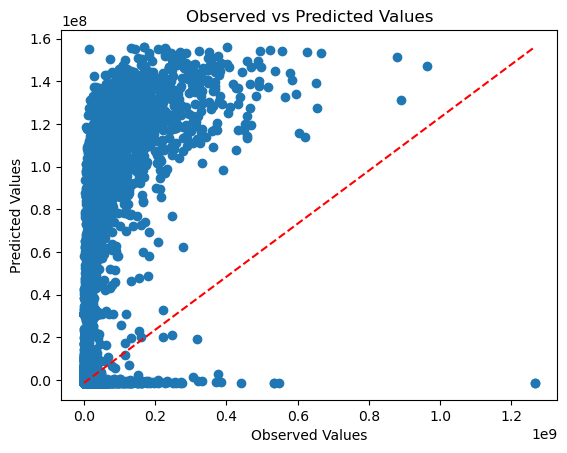

In [99]:
#Calculating the regression line equation
x = cleaned_df['theatre_count']
y = cleaned_df['worldwide_box_office']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

#Extracting the observed and predicted values
observed = cleaned_df['worldwide_box_office']
predicted = regression_line(cleaned_df['theatre_count'])

#Plotting the observed vs predicted values
plt.scatter(observed, predicted)
plt.plot([min(observed), max(observed)], [min(predicted), max(predicted)], color='red', linestyle='--')  # Add the regression line
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')

plt.show()

The assumption of linearity is not met so we cannot run the regression analysis. We do however, want to check the correlation between runtime and worldwide box office. We cannot imply causation so we can't tell whether one variable causes changes in the other, only that they tend to change together.

In [100]:
#Seeing the correlation between theatre count and worldwide box office
correlation = cleaned_df['theatre_count'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Theatre Count and Worldwide Box Office:", correlation)


Correlation between Theatre Count and Worldwide Box Office: 0.5812139949928439


We conlude that there is a medium correlation between theatre count and worldwide box office.

### Average run per theatre

Seeing the distribution and dropping visible outliers.

<Axes: >

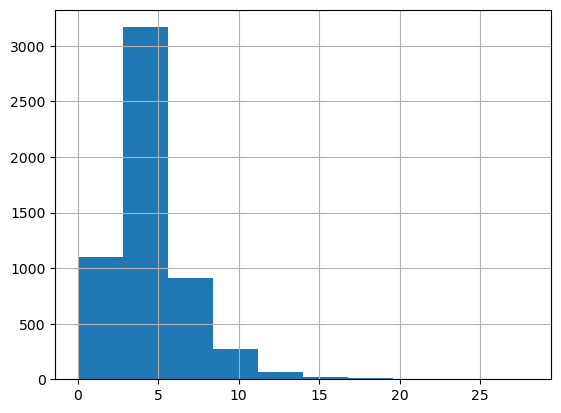

In [101]:
#Disribution of average run per theatre
cleaned_df['avg_run_per_theatre'].hist()

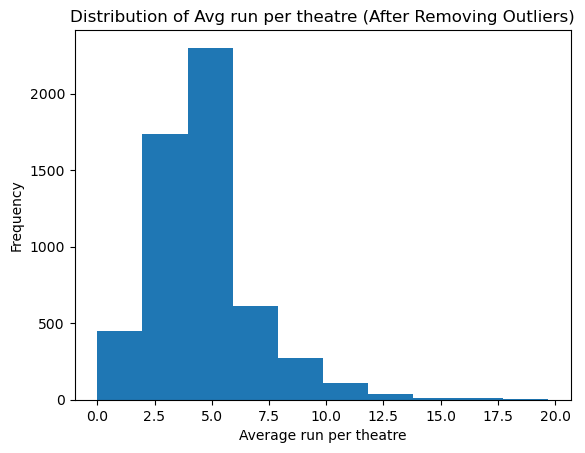

In [102]:
#Removing outliers after 20 for the avg_run_per_theatre column
cleaned_df = cleaned_df[cleaned_df['avg_run_per_theatre'] <= 20]

#Creating a new histogram of the column
plt.hist(cleaned_df['avg_run_per_theatre'], bins=10)
plt.xlabel('Average run per theatre')
plt.ylabel('Frequency')
plt.title('Distribution of Avg run per theatre (After Removing Outliers)')
plt.show()


Seeing the relationship between Avg run per theatre and Worldwide box office. From the scatter plot we don't really see a strong direction of relationship between the variables

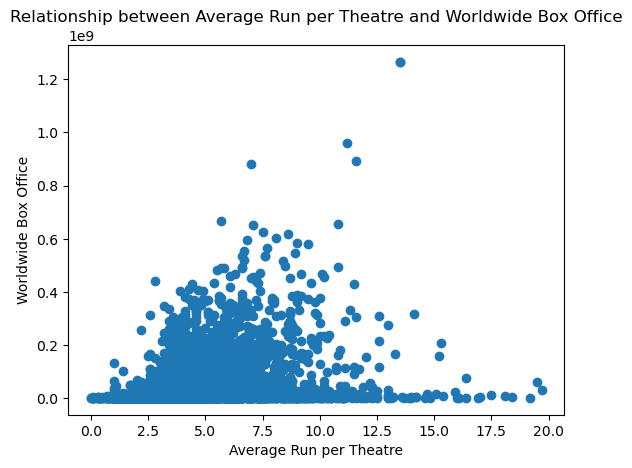

In [103]:
#Creating a scatter plot
plt.scatter(cleaned_df['avg_run_per_theatre'], cleaned_df['worldwide_box_office'])
plt.xlabel('Average Run per Theatre')
plt.ylabel('Worldwide Box Office')
plt.title('Relationship between Average Run per Theatre and Worldwide Box Office')

#Showing the plot
plt.show()


We also want to calculate the actual vs predicted values with the regression line. We do this to check the assumption of linearity in order to run a regression analysis. If this assumption holds true, the plot of actual vs. predicted values should show points scattered around the regression line in a random, evenly distributed manner, without any discernible pattern.

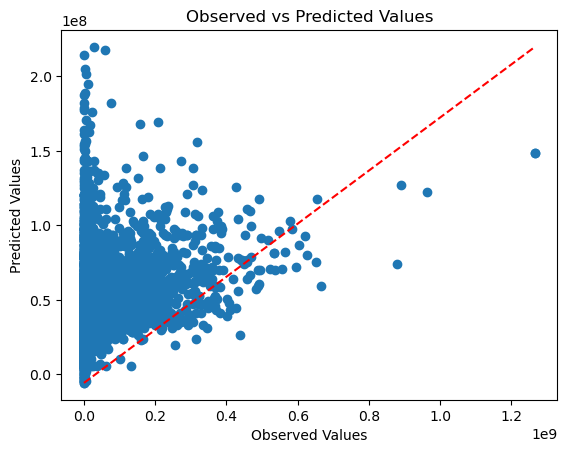

In [104]:
#Calculating the regression line equation
x = cleaned_df['avg_run_per_theatre']
y = cleaned_df['worldwide_box_office']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

#Extracting the observed and predicted values
observed = cleaned_df['worldwide_box_office']
predicted = regression_line(cleaned_df['avg_run_per_theatre'])

#Plotting the observed vs predicted values
plt.scatter(observed, predicted)
plt.plot([min(observed), max(observed)], [min(predicted), max(predicted)], color='red', linestyle='--')  # Add the regression line
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')

plt.show()

The assumption of linearity is not met so we cannot run the regression analysis. We do however, want to check the correlation between runtime and worldwide box office. We cannot imply causation so we can't tell whether one variable causes changes in the other, only that they tend to change together.

In [105]:
#Seeing the correlation between avg run per theatre and worldwide box office
correlation = cleaned_df['avg_run_per_theatre'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Avg run per theatre and Worldwide Box Office:", correlation)

Correlation between Avg run per theatre and Worldwide Box Office: 0.30236355494351486


We conclude that there is a weak correlation between avg run per theatre and worldwide box office.

### Genre

Seeing the genre distribution

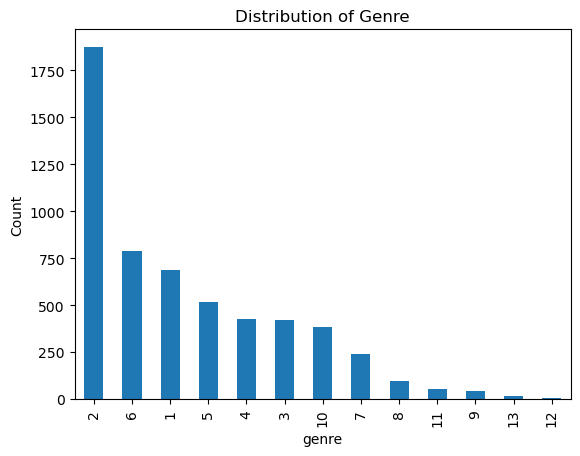

In [106]:
#Selecting the genre column
genre_column = cleaned_df['genre']

#Counting the occurrences of each genre
genre_counts = genre_column.value_counts()

#Plotting the distribution
genre_counts.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('Count')
plt.title('Distribution of Genre')
plt.show()


Looking at the mean worldwide box office per genre, we can see that 10 (adventure) and 11 (musical) have the highest score, whereas 5 (Documentary) and 12 (Multiple genres) have the lowest score

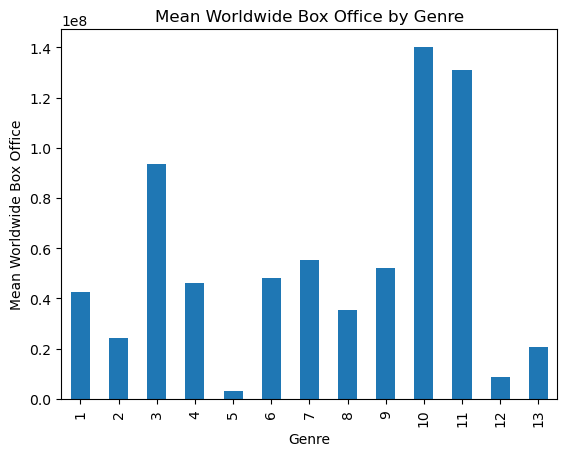

In [107]:
#Selecting the columns of interest
genre_column = cleaned_df['genre']
box_office_column = cleaned_df['worldwide_box_office']

#Grouping the box office data by genre and calculate the mean
mean_box_office_by_genre = box_office_column.groupby(genre_column).mean()

#Plotting the mean box office by genre
mean_box_office_by_genre.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Mean Worldwide Box Office')
plt.title('Mean Worldwide Box Office by Genre')
plt.show()


I want to take the top 5 genres by count and run a multivariate analysis to see if there are significant differences between the groups.

First we need to test the assumption of the homogeneity of variances.

In [108]:
#Extracting the data for each genre
genre2_data = cleaned_df[cleaned_df['genre'] == 2]['worldwide_box_office']
genre7_data = cleaned_df[cleaned_df['genre'] == 7]['worldwide_box_office']
genre8_data = cleaned_df[cleaned_df['genre'] == 8]['worldwide_box_office']
genre1_data = cleaned_df[cleaned_df['genre'] == 1]['worldwide_box_office']
genre6_data = cleaned_df[cleaned_df['genre'] == 6]['worldwide_box_office']

#Performing Levene's test
statistic, p_value = levene(genre2_data, genre7_data, genre8_data, genre1_data, genre6_data)

#Printing the test result
print("Levene's Test Result:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Levene's Test Result:
Test Statistic: 27.873265858966672
p-value: 7.776218040025163e-23


Levene is significant so we cannot run an ANOVA because it violates the assumption of homogeneity of variances. Therefore, we will run a Kruskal-Wallis test.

In [109]:
#Extracting the data for each genre
genre2_data = cleaned_df[cleaned_df['genre'] == 2]['worldwide_box_office']
genre7_data = cleaned_df[cleaned_df['genre'] == 7]['worldwide_box_office']
genre8_data = cleaned_df[cleaned_df['genre'] == 8]['worldwide_box_office']
genre1_data = cleaned_df[cleaned_df['genre'] == 1]['worldwide_box_office']
genre6_data = cleaned_df[cleaned_df['genre'] == 6]['worldwide_box_office']

#Running the Kruskal-Wallis test
statistic, p_value = kruskal(genre2_data, genre7_data, genre8_data, genre1_data, genre6_data)

#Printing the test result
print("Kruskal-Wallis Test Result:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Kruskal-Wallis Test Result:
Test Statistic: 193.52963691505477
p-value: 9.241785824953009e-41


The Kruskal-Wallis test provides a test statistic and a p-value. The test statistic is a measure of the overall differences between the groups, while the p-value tells you the probability of observing your data given that the null hypothesis is true.

In this case:

The test statistic is 193.53. This value by itself doesn't tell us much without the context of the p-value and the degrees of freedom of your test.

The p-value is extremely small (9.24e-41), much less than the common significance level of 0.05. This means that the probability of observing such a large test statistic if the null hypothesis were true (i.e., all group distributions are identical) is extremely low.

Therefore, we can interpret these results as strong evidence against the null hypothesis. There is a statistically significant difference in the distribution of worldwide box office across the different genre groups.



### Rating

Seeing the counts of each rating in the dataset.

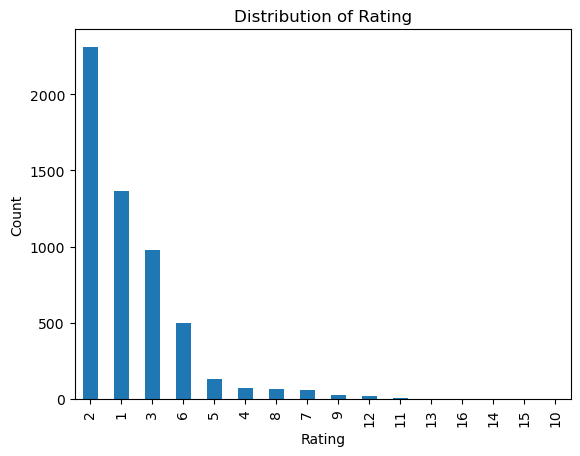

In [110]:
#Selecting the rating column
rating_column = cleaned_df['rating']

#Counting the occurrences of each genre
rating_counts = rating_column.value_counts()

#Plotting the distribution
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.show()

Seeing the mean worldwide box office per rating. We can see that 13 (TV-G) has the highest score, whereas 10 (MA-17) and 15 (Approved) have the lowest score.

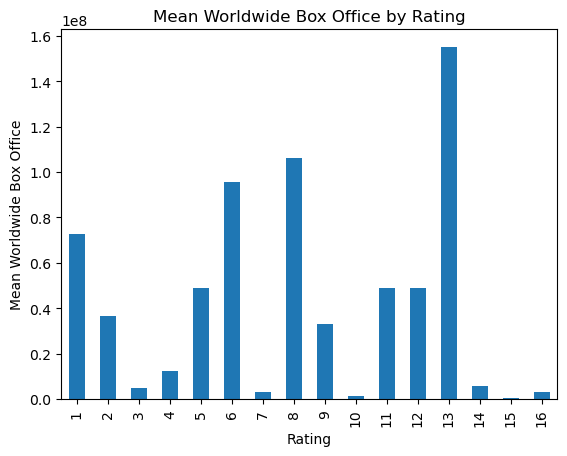

In [111]:
#Selecting the columns of interest
rating_column = cleaned_df['rating']
box_office_column = cleaned_df['worldwide_box_office']

#Grouping the box office data by rating and calculate the mean
mean_box_office_by_rating = box_office_column.groupby(rating_column).mean()

#Plotting the mean box office by rating
mean_box_office_by_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Mean Worldwide Box Office')
plt.title('Mean Worldwide Box Office by Rating')
plt.show()

We also want to see the correlation between rating and worlwide box office. We can conlcude that there is basically now correlation between them.

In [112]:
#Seeing the correlation between rating and worldwide box office
correlation = cleaned_df['rating'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Rating and Worldwide Box Office:", correlation)

Correlation between Rating and Worldwide Box Office: 0.03118632697787647


### Creative type

Seeing the count of movies per creative type.

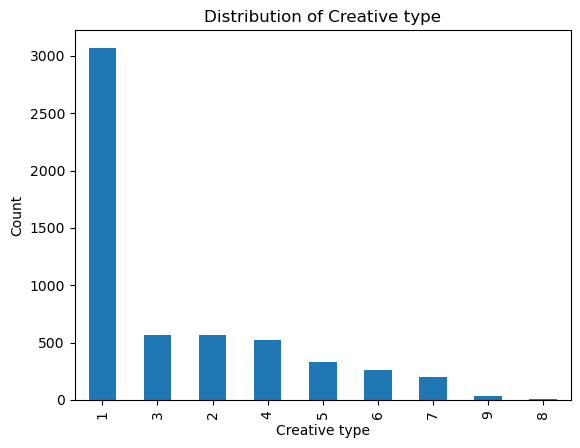

In [113]:
#Selecting the creative type column
creative_type_column = cleaned_df['creative_type']

#Counting the occurrences of each creative type
creative_type_counts = creative_type_column.value_counts()

#Plotting the distribution
creative_type_counts.plot(kind='bar')
plt.xlabel('Creative type')
plt.ylabel('Count')
plt.title('Distribution of Creative type')
plt.show()

Seeing the mean worldwide box office per creative type. We can conclude that 7 (Kids fiction) has the highest score, whereas 4 (Factual) has the lowest score.

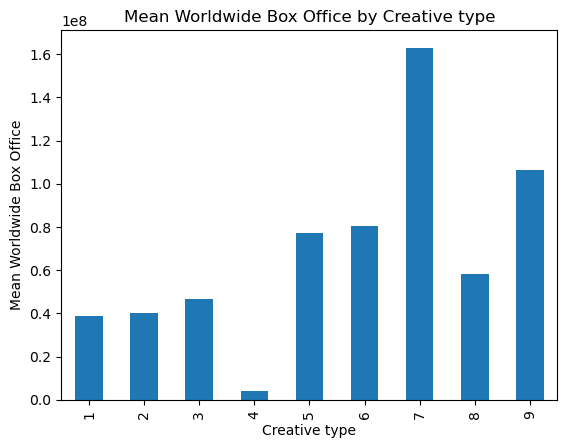

In [114]:
#Selecting the columns of interest
creative_type_column = cleaned_df['creative_type']
box_office_column = cleaned_df['worldwide_box_office']

#Grouping the box office data by creative type and calculate the mean
mean_box_office_by_creative_type = box_office_column.groupby(creative_type_column).mean()

#Plotting the mean box office by creative type
mean_box_office_by_creative_type.plot(kind='bar')
plt.xlabel('Creative type')
plt.ylabel('Mean Worldwide Box Office')
plt.title('Mean Worldwide Box Office by Creative type')
plt.show()

We also want to see the correlation between creative type and worldwide box office. We can conclude that there is a small correlation between them.

In [115]:
#Seeing the correlation between creative type and worldwide box office
correlation = cleaned_df['creative_type'].corr(cleaned_df['worldwide_box_office'])
print("Correlation between Creative Type and Worldwide Box Office:", correlation)


Correlation between Creative Type and Worldwide Box Office: 0.19721826247794458


### Worldwide box office

Seeing the distribution and dropping visible outliers

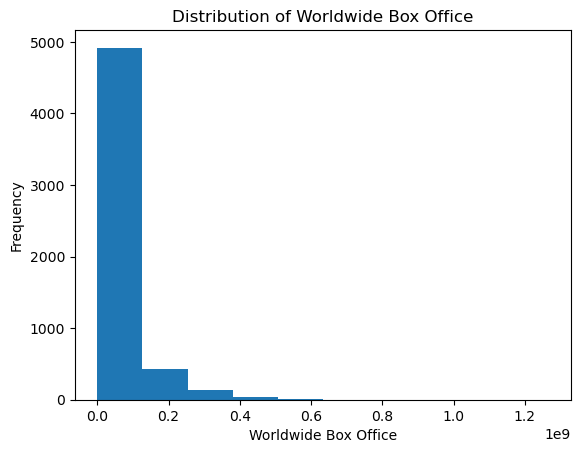

In [116]:
#Seeing the distribution of the worldwide box office
plt.hist(cleaned_df['worldwide_box_office'], bins=10)
plt.xlabel('Worldwide Box Office')
plt.ylabel('Frequency')
plt.title('Distribution of Worldwide Box Office')
plt.show()


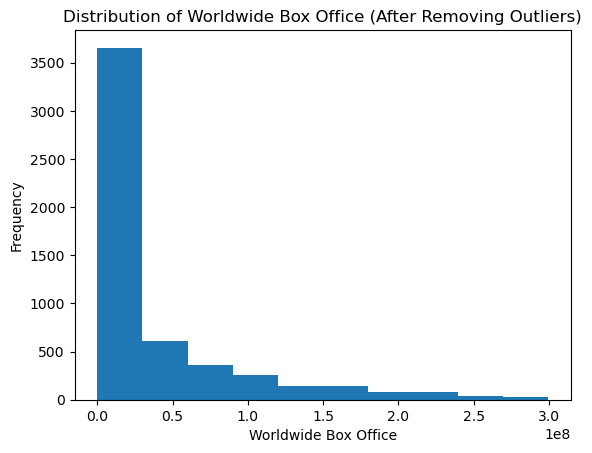

In [117]:
#Removeing outliers after 0.4e9 in the dataset
cleaned_df = cleaned_df[cleaned_df['worldwide_box_office'] <= 0.3e9]

#Creating a new histogram of the worldwide box office
plt.hist(cleaned_df['worldwide_box_office'], bins=10)
plt.xlabel('Worldwide Box Office')
plt.ylabel('Frequency')
plt.title('Distribution of Worldwide Box Office (After Removing Outliers)')
plt.show()


### Correlation matrix

We want to see the correlation of all features with worldiwde box office to see which columns we need to drop before modelling. We want to drop columns with negative correlations or almost no correltion for the models to perform better.

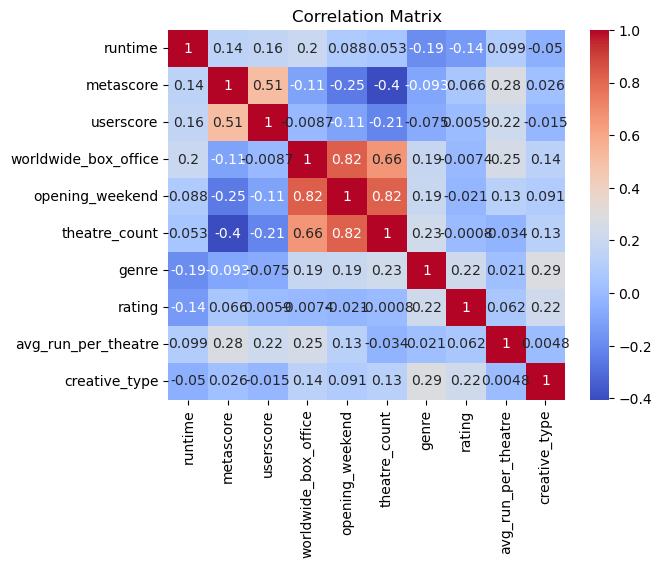

In [118]:
#Calculating the correlation matrix
correlation_matrix = cleaned_df[['runtime', 'metascore','userscore', 'worldwide_box_office', 'opening_weekend', 'theatre_count', 'genre', 'rating', 'avg_run_per_theatre', 'creative_type']].corr()

#Creating a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Setting the title
plt.title('Correlation Matrix')

#Showing the plot
plt.show()


We are dropping metascore, userscore, and rating because their correlation with worldwide box office is negative. We are also dropping opening weekend because of it's high correlation with worldwide box office, because, although high correlation is what we're looking for, opening weekend is a part of worldwide box office and will therefore mess up the models.

In [119]:
#Dropping the selected columns
cleaned_df = cleaned_df.drop(['metascore', 'userscore', 'rating', 'opening_weekend'], axis=1)


### Feature engineering

In the cleaning file, we created from the RelDate column a new column named 'month'. We will now transform this column into seasons. More specifically, meteorological seasons. This means that winter months will correspond to 1, spring months will correpsond to 2, summer mojnths to 3, and autumn months to 4.

In [120]:
#Creating a new column "seasons" based on the values in the "month" column
cleaned_df['seasons'] = cleaned_df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 2 if x in [3, 4, 5] else 3 if x in [6, 7, 8] else 4)

#Displaying the updated dataframe
cleaned_df.head()


,runtime,genre,worldwide_box_office,theatre_count,avg_run_per_theatre,creative_type,month,seasons
0,104.0,1,108286422.0,3391.0,4.9,1,3,2
1,100.0,2,987640.0,3.0,2.1,1,9,4
2,93.0,2,307.0,819.5,4.2,1,1,1
3,93.0,2,47019.0,819.5,4.2,1,5,2
4,107.0,2,143782.0,6.0,3.8,2,8,3


Seeing the distribution of seasonal release dates.

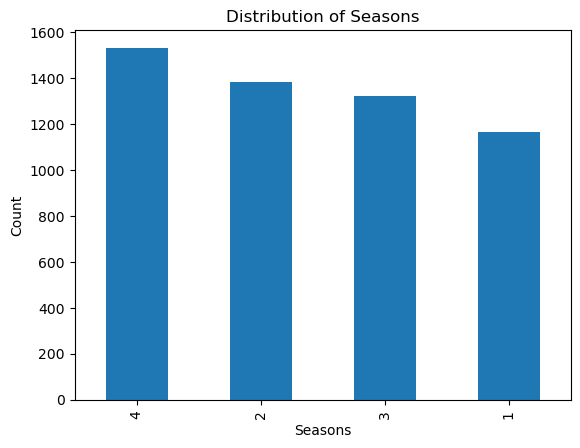

In [121]:
#Counting the occurrences of each season
season_counts = cleaned_df['seasons'].value_counts()

#Plotting the distribution
season_counts.plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Distribution of Seasons')
plt.show()


Looking at the mean worldwide box office for every season. We can conclude that winter has the highest score and spring the lowest.

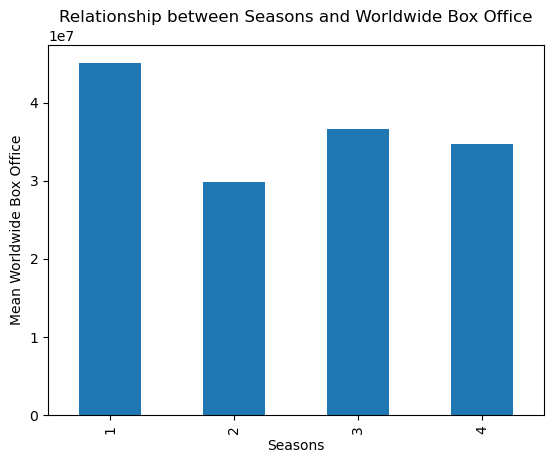

In [122]:
#Grouping the data by seasons and calculate the mean worldwide box office for each season
seasons_mean = cleaned_df.groupby('seasons')['worldwide_box_office'].mean()

#Plotting the bar plot
seasons_mean.plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Mean Worldwide Box Office')
plt.title('Relationship between Seasons and Worldwide Box Office')
plt.show()


We are also interested in running a multivariate analysis to see if there are significant differences in seasons in regard to worldwide box office.

First, we need to check for homogeneity of variances.

In [123]:
#Extracting the data for each season
season1_data = cleaned_df[cleaned_df['seasons'] == 1]['worldwide_box_office']
season2_data = cleaned_df[cleaned_df['seasons'] == 2]['worldwide_box_office']
season3_data = cleaned_df[cleaned_df['seasons'] == 3]['worldwide_box_office']
season4_data = cleaned_df[cleaned_df['seasons'] == 4]['worldwide_box_office']

#Performing Levene's test
statistic, p_value = levene(season1_data, season2_data, season3_data, season4_data)

#Printing the test result
print("Levene's Test Result:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Levene's Test Result:
Test Statistic: 13.350507641092346
p-value: 1.1147324401772173e-08


Levene is significant so we cannot run an ANOVA because it violates the assumption of homogeneity of variances. Therefore, we will run a Kurskal-Wallis test.

In [124]:
#Extracting the data for each season
season1_data = cleaned_df[cleaned_df['seasons'] == 1]['worldwide_box_office']
season2_data = cleaned_df[cleaned_df['seasons'] == 2]['worldwide_box_office']
season3_data = cleaned_df[cleaned_df['seasons'] == 3]['worldwide_box_office']
season4_data = cleaned_df[cleaned_df['seasons'] == 4]['worldwide_box_office']

#Running the Kruskal-Wallis test
statistic, p_value = kruskal(season1_data, season2_data, season3_data, season4_data)

#Printing the test result
print("Kruskal-Wallis Test Result:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Kruskal-Wallis Test Result:
Test Statistic: 44.92053727154561
p-value: 9.619576143622784e-10


Based on the results of the Kruskal-Wallis test, where the test statistic is 44.92 and the p-value is extremely small (9.62e-10), we can conclude that there is a statistically significant difference in the distributions of the seasons in regard to worldwide box office. The p-value is much less than the conventional 0.05 threshold for significance, which provides strong evidence against the null hypothesis that all groups have the same distribution.

Now we drop the month column because we have seasons.

In [125]:
#Dropping the month column as we now have seasons
cleaned_df.drop('month', axis=1, inplace=True)

cleaned_df


,runtime,genre,worldwide_box_office,theatre_count,avg_run_per_theatre,creative_type,seasons
0,104.0,1,108286422.0,3391.0,4.9,1,2
1,100.0,2,987640.0,3.0,2.1,1,4
2,93.0,2,307.0,819.5,4.2,1,1
3,93.0,2,47019.0,819.5,4.2,1,2
4,107.0,2,143782.0,6.0,3.8,2,3
...,...,...,...,...,...,...,...
5818,102.0,6,55348693.0,3394.0,2.8,1,1
5819,83.0,10,2784.0,819.5,4.2,1,3
5820,83.0,10,12506188.0,2501.0,2.6,9,3
5821,96.0,10,2784.0,819.5,4.2,1,4


In [126]:
# Saving the DataFrame as a CSV file
csv_file = r"C:\Users\ottok\OneDrive\Documents\AI_resit_EDA.xlsx"
cleaned_df.to_csv(csv_file, index=False)

print(f"CSV file '{csv_file}' has been created.")

CSV file 'C:\Users\ottok\OneDrive\Documents\AI_resit_EDA.xlsx' has been created.
